# Polygons

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

### Results

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from decimal import *

<IPython.core.display.Javascript object>

In [3]:
# Obtain results
with open('results.json', "r", encoding="utf-8") as f:
    results: dict[str, int] = json.load(f)

solved_values = {}
for k,v in results.items():
    solved_values[int(k)] = v

<IPython.core.display.Javascript object>

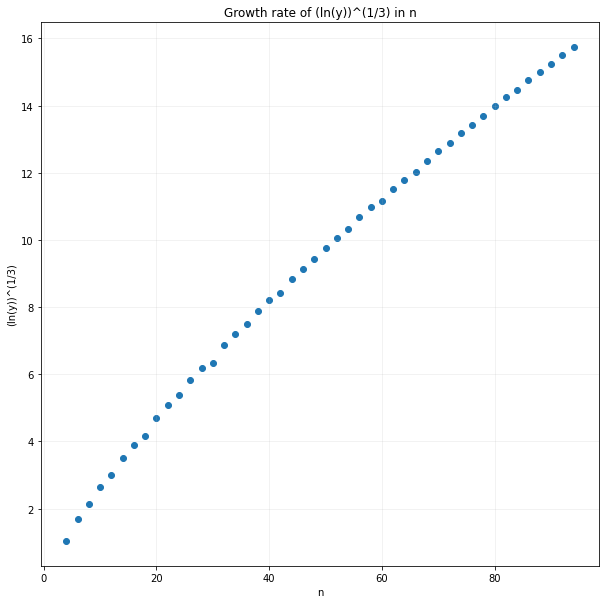

<IPython.core.display.Javascript object>

In [4]:
a,b = zip(*solved_values.items())

data = {
    'n': a,
    'paths': [Decimal(item) for item in b]
}

df = pd.DataFrame.from_dict(data)

# Analysis
df['ln_paths'] = df['paths'].apply(lambda x: x.ln())
df['ln_paths'] = df['ln_paths'].astype(np.float32)
df['cubert_ln_paths'] = np.cbrt(df['ln_paths'])

# Preparing final plot
df = df[['n', 'cubert_ln_paths']].copy()
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('w')
ax.set_xlabel('n')
ax.set_ylabel('(ln(y))^(1/3)')
ax.set_title('Growth rate of (ln(y))^(1/3) in n')
ax.grid(axis='both', alpha=0.2)
ax.scatter(x=df.n, y=df.cubert_ln_paths)

As the plot is close to linear, we think that the growth rate in $n$ (where $n$ is the number of sides of the polygon) is $e^{n^3}$.